In [42]:
!pip install mglearn

In [43]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(centers=4, random_state=8)

In [44]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, Y)

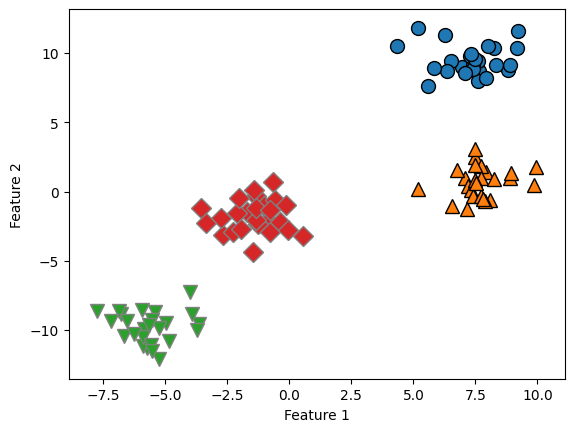

In [45]:
import mglearn
import matplotlib.pyplot as plt

# mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [46]:
import numpy as np

X_new = np.hstack([X, (X[:,1]**2).reshape(-1, 1)])

In [47]:
X_new.shape

(100, 3)

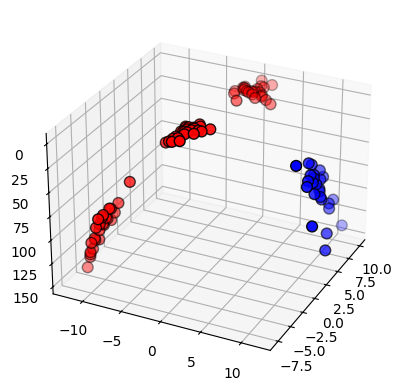

In [48]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Method 1: Using add_subplot with projection='3d' (recommended)
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.view_init(elev=-152, azim=-26)

mask = Y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', s=60, edgecolor='k')

plt.show()

In [49]:
linear_svm_3d = LinearSVC().fit(X_new, Y)
intercept, coeffs = linear_svm_3d.intercept_, linear_svm_3d.coef_

In [50]:
print(intercept)

[-1.02883244 -0.61149055 -1.49272117  0.84811687]


In [51]:
print(coeffs)

[[-0.08447216  0.21228688  0.0147687 ]
 [ 0.36946192  0.1107445  -0.15573608]
 [-0.0611254  -0.12515587  0.01692399]
 [-0.33037769 -0.43219985 -0.11896883]]


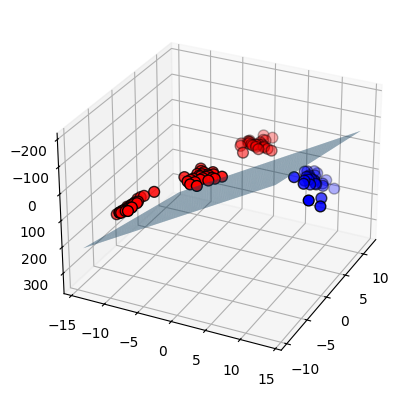

In [52]:
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.view_init(elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coeffs[0][0] * XX + coeffs[0][1] * YY + intercept[0]) / -coeffs[0][2]

ax.plot_surface(XX, YY, ZZ, alpha=0.5)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', s=60, edgecolor='k')

plt.show()

In [75]:
linear_svm_3d = LinearSVC().fit(X_new, Y)
coeffs = linear_svm_3d.coef_.ravel()
intercept = linear_svm_3d.intercept_

In [80]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coeffs[0] * XX + coeffs[1] * YY + intercept[0]) / -coeffs[2]

ax.plot_surface(XX, YY, ZZ, alpha=0.5)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', s=60, edgecolor='k')

plt.show()

<Figure size 640x480 with 0 Axes>

In [78]:
coeffs[1] * YY

array([[-2.99723755, -2.99723755, -2.99723755, ..., -2.99723755,
        -2.99723755, -2.99723755],
       [-2.87636636, -2.87636636, -2.87636636, ..., -2.87636636,
        -2.87636636, -2.87636636],
       [-2.75549517, -2.75549517, -2.75549517, ..., -2.75549517,
        -2.75549517, -2.75549517],
       ...,
       [ 2.68370836,  2.68370836,  2.68370836, ...,  2.68370836,
         2.68370836,  2.68370836],
       [ 2.80457955,  2.80457955,  2.80457955, ...,  2.80457955,
         2.80457955,  2.80457955],
       [ 2.92545074,  2.92545074,  2.92545074, ...,  2.92545074,
         2.92545074,  2.92545074]])